In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
from sklearn.metrics import f1_score, make_scorer, classification_report

scorer = make_scorer(f1_score, pos_label=None, average='weighted')

#This fixes the date to be in the correct format while reading the file in
df = pd.read_csv('data/2017_2018BoxScores.csv', parse_dates=['Date'])

#Renaming Columns to have them make more sense 
df.columns = ['Date', 'StartTime', 'VisitorTeam', 'VisitorPoints',
              'HomeTeam', 'HomePoints', 'ScoreType', 'OT', 'Attendance','Notes']




In [4]:
#Interesting note that you can get up to the 5th index with a COLON and 5 
#THIS CAN BE REMOVED LATER
df.loc[:5]

,Date,StartTime,VisitorTeam,VisitorPoints,HomeTeam,HomePoints,ScoreType,OT,Attendance,Notes
0,2017-10-17,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN
1,2017-10-17,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN
2,2017-10-18,7:30p,Milwaukee Bucks,108,Boston Celtics,100,Box Score,NaN,18624,NaN
3,2017-10-18,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,Box Score,NaN,19709,NaN
4,2017-10-18,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN
5,2017-10-18,7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN


In [5]:
df['HomeWins'] = df['HomePoints'] > df['VisitorPoints']
y_true = df['HomeWins'].values

In [6]:
#REMOVE THIS LATER
df.head()

,Date,StartTime,VisitorTeam,VisitorPoints,HomeTeam,HomePoints,ScoreType,OT,Attendance,Notes,HomeWins
0,2017-10-17,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN,True
1,2017-10-17,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN,False
2,2017-10-18,7:30p,Milwaukee Bucks,108,Boston Celtics,100,Box Score,NaN,18624,NaN,False
3,2017-10-18,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,Box Score,NaN,19709,NaN,False
4,2017-10-18,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN,True


In [7]:
#Simple Prediction that the home team wins
n_games = df['HomeWins'].count()
print(n_games)
n_homewins = df['HomeWins'].sum()
print(n_homewins)
win_percentage = 100 * (n_homewins / n_games)
print('Home Team Win Percentage' , win_percentage)

544
316
Home Team Win Percentage 58.0882352941


In [8]:
#Predicting the score we need to beat to have an advantage 
#This score we need to beat is the score you get when always picking the home team to win
from sklearn.metrics import f1_score
y_pred= [1] * len(y_true)
f1_score(y_true, y_pred, pos_label = None, average='weighted')

/Users/saffanprasla/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4268809849521204

In [9]:
#Going through and setting the LastWins for both home and Visitor based off of previous data
from collections import defaultdict
home_won_last = defaultdict(int)
visitor_won_last = defaultdict(int)

def home_team_won_last(row):
    home_team = row['HomeTeam']
    #visitor_team = row['VisitorTeam']
    #teams = tuple(home_team, visitory_team)
    home_team_result = True if home_won_last[home_team] else False
    #visitor_team_result = 1 if won_last[visitor_team] else 0
    #setting the variable
    home_won_last[home_team] = row["HomeWins"]
    return home_team_result

def visitor_team_won_last(row):
    visitor_team = row['VisitorTeam']
    #visitor_team = row['VisitorTeam']
    #teams = tuple(home_team, visitory_team)
    visitor_team_result = True if visitor_won_last[visitor_team] else False
    #visitor_team_result = 1 if won_last[visitor_team] else 0
    #setting the variable
    visitor_won_last[visitor_team] = not row["HomeWins"]
    return visitor_team_result


df["HomeLastWin"] = df.apply(home_team_won_last, axis=1)
df["VisitorLastWin"] = df.apply(visitor_team_won_last, axis=1)

In [10]:
#This Can be removed
df.loc[:35]

,Date,StartTime,VisitorTeam,VisitorPoints,HomeTeam,HomePoints,ScoreType,OT,Attendance,Notes,HomeWins,HomeLastWin,VisitorLastWin
0,2017-10-17,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN,True,False,False
1,2017-10-17,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN,False,False,False
2,2017-10-18,7:30p,Milwaukee Bucks,108,Boston Celtics,100,Box Score,NaN,18624,NaN,False,False,False
3,2017-10-18,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,Box Score,NaN,19709,NaN,False,False,False
4,2017-10-18,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN,True,False,False
5,2017-10-18,7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN,True,False,False
6,2017-10-18,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,Box Score,NaN,17794,NaN,True,False,False
7,2017-10-18,7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,NaN,True,False,False
8,2017-10-18,10:00p,Portland Trail Blazers,124,Phoenix Suns,76,Box Score,NaN,18055,NaN,False,False,False
9,2017-10-18,10:00p,Houston Rockets,105,Sacramento Kings,100,Box Score,NaN,17583,NaN,False,False,True


In [11]:
#Going through and setting the LastWins for both home and Visitor based off of previous data
from datetime import datetime, timedelta

#This gets the Home Teams Rest and if they had a back to back home game
#Line commented below can be used later to get the number of days of rest
#df['HomeRest'] =  df.groupby(['HomeTeam'])['Date'].diff() - timedelta(days=1) 
home_rest_holder = df.groupby(['HomeTeam'])['Date'].diff() - timedelta(days=1) == timedelta(days=0)
df['HomeBackToBack'] = home_rest_holder


#This gets the Away Team and if they had a back to back away Game
#Line commented below can be used later to get the number of days of rest
#df['VisitorRest'] =  df.groupby(['VisitorTeam'])['Date'].diff() - timedelta(days=1) 
visitor_rest_holder = df.groupby(['VisitorTeam'])['Date'].diff() - timedelta(days=1)  == timedelta(days=0)
df['VisitorBackToBack'] = visitor_rest_holder


##NOTE THIS NEEDS TO BE A BACK TO BACK GAME REGARDLESS OF HOME OR AWAY.. RIGHT NOW IT DOESNT ACCOUNT FOR BOTH



In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14)

In [13]:
from sklearn.model_selection import cross_val_score

X_previous_wins = df[['HomeLastWin', 'VisitorLastWin','HomeBackToBack', 'VisitorBackToBack']]
y = df['HomeWins']
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_previous_wins,y_true, scoring=scorer)
print(scores.mean())

0.52669992442


In [14]:
rankingsDF = pd.read_csv('data/NBAExpandedStandings2018_2019.csv', skiprows=[0], index_col='Team')
teamPerGameStats = pd.read_csv('data/TeamPerGameStats2018_2019.csv', index_col='Team')

In [16]:
#This method below finds the rankings of the visitor team and the home team and visitor team
#and sets the row to true if home team ranks higher else false.

def home_team_rankings_higher(row):
    home_team  = row['HomeTeam']
    visitor_team = row['VisitorTeam']
    home_rank = rankingsDF.loc[home_team]['Rk']
    visitor_rank = rankingsDF.loc[visitor_team]['Rk']
    return home_rank < visitor_rank #the lower the rank the higher you are thats why hometeam < visitor

df['HomeTeamRanksHigher'] = df.apply(home_team_rankings_higher, axis = 1)


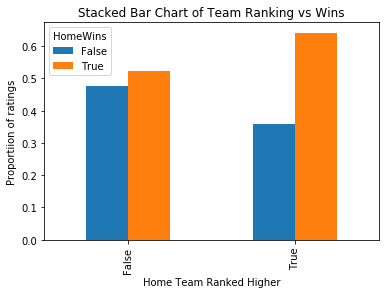

In [23]:
table=pd.crosstab(df.HomeTeamRanksHigher,df.HomeWins)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Team Ranking vs Wins')
plt.xlabel('Home Team Ranked Higher')
plt.ylabel('Proportiion of ratings')
plt.savefig('mariral_vs_pur_stack')

In [28]:
import sklearn.linear_model

# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['HomeTeamRanksHigher'].values.reshape(-1, 1), df['HomeWins'])
print(clf.intercept_, clf.coef_)

[ 0.09325749] [[ 0.48866405]]


In [26]:
#This method below finds teams per game stats that is still in the works like FG%, 3P%, Assist
#And Compares them to the opponents and if its higher then it will be true else false
def home_team_field_goal_percent_higher(row, column_name):
    home_team  = row['HomeTeam']
    visitor_team = row['VisitorTeam']
    home_fg_percentage = teamPerGameStats.loc[home_team][column_name]
    visitor_fg_percentage = teamPerGameStats.loc[visitor_team][column_name]
    return home_fg_percentage > visitor_fg_percentage




def home_team_per_assist_turnover_ratio_higher(row):
    home_team  = row['HomeTeam']
    visitor_team = row['VisitorTeam']
    home_assist_turnover_ratio = teamPerGameStats.loc[home_team]['AST'] / teamPerGameStats.loc[home_team]['TOV']
    visitor_assist_turnover_ratio = teamPerGameStats.loc[visitor_team]['AST'] / teamPerGameStats.loc[visitor_team]['TOV']
    return home_assist_turnover_ratio > visitor_assist_turnover_ratio 


df['HomeTeamFG%Higher'] = df.apply(home_team_field_goal_percent_higher, args=('FG%',) ,axis = 1)
df['HomeTeam3P%Higher'] = df.apply(home_team_field_goal_percent_higher, args=('3P%',) ,axis = 1)
df['HomeTeamAssistTurnOverRatioHigher'] = df.apply(home_team_per_assist_turnover_ratio_higher, axis = 1)

In [ ]:
df.loc[15:35][['HomeWins','HomeTeamFG%Higher', 'HomeTeam3P%Higher', 'HomeTeamAssistTurnOverRatioHigher']]

In [ ]:
X_homeTeamsStats = df[['HomeTeamRanksHigher', 'HomeTeamFG%Higher', 'HomeTeam3P%Higher', 'HomeTeamAssistTurnOverRatioHigher']]
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_homeTeamsStats ,y_true, scoring=scorer)
print(scores.mean())

In [ ]:
X_homeTeamRankedHigher = df[['HomeTeamRanksHigher', 'VisitorBackToBack','HomeTeamFG%Higher', 'HomeTeamAssistTurnOverRatioHigher','HomeTeam3P%Higher']]
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_homeTeamRankedHigher,y_true, scoring=scorer)
print(scores.mean())


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}
clf = DecisionTreeClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space, scoring = scorer)
grid.fit(X_homeTeamRankedHigher, y_true)
print(grid.best_score_)


In [ ]:
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
encoding.fit((df['HomeTeam']).values)

In [ ]:
home_teams = encoding.transform(df['HomeTeam'].values)
visitor_teams = encoding.transform(df['VisitorTeam'].values)
X_teams = np.vstack([home_teams, visitor_teams]).T
X_teams[:5],X_teams.shape

In [ ]:
one_hot = OneHotEncoder()
X_teams = one_hot.fit_transform(X_teams).todense()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=14)
scores = cross_val_score(clf, X_teams,y_true, scoring=scorer)
print(scores.mean())

In [ ]:
X_all = np.hstack([X_homeTeamRankedHigher, X_teams])


clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_all,y_true, scoring=scorer)
print(scores.mean())

In [ ]:
# parameter_space = {
#     'max_features': [2, 10, 50, 'auto'],
#     'n_estimators':[50,100,200],
#     'criterion':['gini', 'entropy'],
# }
# clf = RandomForestClassifier(random_state=14)
# grid = GridSearchCV(clf, parameter_space, scoring = scorer)
# grid.fit(X_all, y_true)
# print(grid.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space, scoring = scorer)
grid.fit(X_all, y_true)
print(grid.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)
grid.fit(X_homeTeamRankedHigher, y)
print(grid.best_score_)


In [ ]:
#This fixes the date to be in the correct format while reading the file in
df2 = pd.read_csv('2018_2019BoxScores.csv', parse_dates=['Date'])

#Renaming Columns to have them make more sense 
df2.columns = ['Date', 'StartTime', 'VisitorTeam', 'VisitorPoints',
              'HomeTeam', 'HomePoints', 'ScoreType', 'OT', 'Attendance','Notes']

In [ ]:
rankingsDF = pd.read_csv('NBAExpandedStandings.csv', skiprows=[0], index_col='Team')
teamPerGameStats = pd.read_csv('TeamPerGameStats.csv', index_col='Team')

df2['HomeTeamRanksHigher'] = df2.apply(home_team_rankings_higher, axis = 1)

In [ ]:

df2['HomeTeamFG%Higher'] = df2.apply(home_team_field_goal_percent_higher, args=('FG%',) , axis = 1)
df2['HomeTeam3P%Higher'] = df2.apply(home_team_field_goal_percent_higher, args=('3P%',) ,axis = 1)
df2['HomeTeamAssistTurnOverRatioHigher'] = df2.apply(home_team_per_assist_turnover_ratio_higher, axis = 1)

In [ ]:

df2['HomeWins'] = df2['HomePoints'] > df2['VisitorPoints']

y_test = df2['HomeWins'].values

df2["HomeLastWin"] = df2.apply(home_team_won_last, axis=1)
df2["VisitorLastWin"] = df2.apply(visitor_team_won_last, axis=1)


#This gets the Home Teams Rest and if they had a back to back home game
#Line commented below can be used later to get the number of days of rest
#df['HomeRest'] =  df.groupby(['HomeTeam'])['Date'].diff() - timedelta(days=1) 
home_rest_holder = df2.groupby(['HomeTeam'])['Date'].diff() - timedelta(days=1) == timedelta(days=0)
df2['HomeBackToBack'] = home_rest_holder


#This gets the Away Team and if they had a back to back away Game
#Line commented below can be used later to get the number of days of rest
#df['VisitorRest'] =  df.groupby(['VisitorTeam'])['Date'].diff() - timedelta(days=1) 
visitor_rest_holder = df2.groupby(['VisitorTeam'])['Date'].diff() - timedelta(days=1)  == timedelta(days=0)
df2['VisitorBackToBack'] = visitor_rest_holder

X_homeTeamRankedHigher_december = df2[['HomeTeamRanksHigher', 'VisitorBackToBack','HomeTeamFG%Higher', 'HomeTeamAssistTurnOverRatioHigher','HomeTeam3P%Higher']]



In [ ]:
home_teams = encoding.transform(df2['HomeTeam'].values)
visitor_teams = encoding.transform(df2['VisitorTeam'].values)
X_teams_december = np.vstack([home_teams, visitor_teams]).T

one_hot = OneHotEncoder()
X_teams_december = one_hot.fit_transform(X_teams_december).todense()

X_all = np.hstack([X_homeTeamRankedHigher_december, X_teams_december])

In [ ]:
from sklearn.metrics import classification_report

y_true = [1] * len(y_test)
y_pred = grid.predict(X_homeTeamRankedHigher_december)
print(classification_report(y_test,y_pred))
print('Home Team wins', np.mean(y_test==y_true))
print ('My Predictor', np.mean(y_test==y_pred))